In [118]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [119]:
# Input Variable
firs_population_size = 10
# Generation Size
Generation_size = 100
# Elitism Rate
Elitism_rate = 0.05
#CrossOver Rate
Crossover_rate = 1
#Mutation Rate
Mutation_rate = 1
# peanlty Coeficent
alpha = np.random.uniform(1, 10)
# counts of all elemnts
elemets_len = np.random.randint(0,20) 
# Generate Random weights for Test
weights = list( np.random.randint(10,25, size = elemets_len)  )
# Generate Random values for Test
values  = list(np.random.randint(10,25, size = elemets_len) )
# Generate Random knapsack for Test
knapsack_capacity = np.random.randint(50,100)

# Whats the data
print("peanlty Coeficent: ", alpha)
print("knapsack_capacity: ", knapsack_capacity)
print("count of all elememts", elemets_len)
print("weights: ", weights)
print("values: ", values)

peanlty Coeficent:  6.44689564762813
knapsack_capacity:  93
count of all elememts 7
weights:  [19, 15, 16, 19, 17, 10, 16]
values:  [16, 18, 12, 23, 14, 22, 10]


In [120]:
# Generate initial population
def generate_individual():
    return [np.random.choice([0, 1]) for _ in range(len(weights))]

# Function to initialize a population of chromosomes
def initialize_population(size):
    return [generate_individual() for _ in range(size)]

![Alt text](image.png)

In [121]:
# Evaluate fitness of an individual
def fitness(individual : list, 
            weights : list, 
            values : list, 
            penalty_rate : list,
            Q : float) -> float:
  """Evaluates the fitness of a given individual.
  Args:
  individual (list): The individual to evaluate.
  weights (list): List of weights for each value in the individual.
  values (list): List of possible values that can be used in the individual.
  penalty_rate (float): Penalty rate applied if there are any violations.
  Q (float): Quality factor.
  Returns:
  float: Fitness score of the individual.
  """


  total_values = np.sum(np.array(individual) * values)
  total_weights = np.sum(np.array(individual) * weights)
  Beta = total_weights - Q
  fit = total_values - penalty_rate * max(0, Beta )

  if fit <= Q:
    return fit
  
  else:
    return 0.



In [122]:
def elitism(*,population : list, fitness_values : list , Q : float ,elitism_rate : float = 0.2 ):
    """
    This function implements the elitism operator in a genetic algorithm. It takes as input:
    - population (list of chromosomes)
    - fitness_values (list of floats representing the corresponding fitness values for each chromosome in the population)
    - Q (float between 0 and 1 that represents the mutation rate)
    - elitism_rate (optional parameter to define how many individuals will be selected from the current generation)"""

    population = population.copy()
    fitness_values = fitness_values.copy()
    elite_size = int(round(len(population) * elitism_rate,0))
    elits = []

    for _ in range(elite_size):
        idx = np.argmax(fitness_values)
        if fitness_values[idx] <= Q:
            elits.append(population[idx])
            population.pop(idx)
            fitness_values.pop(idx)

    return elits

In [123]:
# Function to select individuals for reproduction using roulette wheel python
def roulette_wheel_selection( fitness_values : list[float]) -> int:
    """
    This function implements the Roulette Wheel Selection method.
    Parameters:
    fitness_values (list[float]): A list of floats representing the fitness values of a population.
    Returns:
    int: The index in the range [0, len(fitness_values)) that represents an individual selected by the roulette wheel selection method

    """
    spin = np.random.rand()
    probabilitse = [ ]
    for i in fitness_values:
        try:
            probabilitse.append(
                (i / sum(fitness_values))
            )
        except ZeroDivisionError:
            probabilitse.append(0.0)
            
    # print("Spiner: ",spin)
    # print("prob ",probabilitse )
    try:
        spin = np.random.choice(probabilitse, p= probabilitse)
    except ValueError:
        spin = np.random.choice(probabilitse)
    # print("spine: ", probabilitse.index(spin))
    return probabilitse.index(spin)
    # for i in range(1, len(probabilitse)):
    #     if probabilitse[i - 1] < spin < probabilitse[i ] :
    #         return i


In [124]:
def crossover(parent_1, parent_2):
    """
    This function takes two parents and produces a child by performing the crossover operation.
    The crossover point is chosen randomly between 0 and length of string - 1.
    After that, we take half characters from first parent before crossover point and second half after it.
    Then, we concatenate these halves to form the new offspring.
    params: 
        - parent_1: str, first parent's genes
        - parent_2: str, second parent's genes
    :return: str, offspring's genes
    
    """
    crossover_point = np.random.randint(0, len(parent_1) - 1)
    # parent1 = list(parent1)
    # parent2 = list(parent2)
    child1 = parent_1[:crossover_point] + parent_2[crossover_point:]
    child2 = parent_2[:crossover_point] + parent_1[crossover_point:]
    return child1, child2

# Function to apply mutation to an individual (flip bit)
def mutate(individual, mutation_rate):
    individual = individual.copy() 
    mutation_point = np.random.randint(0, len(individual) - 1)
    # for index in range(len(individual)):
    if np.random.random() < mutation_rate:
        if individual[mutation_point] == 1:
            individual[mutation_point] = 0
            
        elif individual[mutation_point] == 0:
            individual[mutation_point] = 1
                
    return individual

In [125]:
# Main genetic algorithm loop
def genetic_algorithm(*,values : list[float],
                      weights: list[float], 
                      init_population_size : int, 
                      generation_size : int,
                      KN_capacity : float,
                      elitism_rate : float,
                      crossover_rate : float , 
                      mutation_rate : float, 
                      penalty_coef : float,
                      print_data : bool = True,
                      show_fitness_graph : bool = True ) -> tuple[list, float] :
    """
    This function implements the main genetic algorithm. It takes as input a set of values and their corresponding weights, initial population size, number of gener
    This function implements the main loop of a genetic algorithm. It takes as input parameters values and weights to be optimized, initial population size, number
    This is the main function of the genetic algorithm. It takes as input a set of values and their corresponding weights, initial population size, number
    This is the main function of the genetic algorithm. It takes as input a set of values and their corresponding weights, initial population size, number
    """
    
    values = values.copy()
    weights = weights.copy()
    init_population = initialize_population(init_population_size)
    new_population = list()

    all_fitness = list()
    # for generation in range(generation_size):
    fitness_values = [fitness(indivisual,weights,
                        values, penalty_coef, KN_capacity) 
                        for indivisual in init_population]
    
    # print(fitness_values)

    elits = elitism(population = init_population, fitness_values = fitness_values, elitism_rate = elitism_rate, Q= KN_capacity)

    new_population.extend( elits)
    for _ in init_population:
        while not len(new_population) >= generation_size:
                spin_roll_1 = roulette_wheel_selection(fitness_values)
                # print("spin_roll_1: ",spin_roll_1)
                parent_A : list = init_population[spin_roll_1]
                spin_roll_2 = roulette_wheel_selection(fitness_values)
                parent_B : list = init_population[spin_roll_2]
                # Apply crossover to generate two children
                if np.random.random() <= crossover_rate:
                    child1, child2 = crossover(parent_A, parent_B)  
                    # Apply mutation to each child
                    child1 = mutate(child1, mutation_rate)
                    child2 = mutate(child2, mutation_rate)
                    # Put the two mutated children into the new population
                    fit_child_1 = fitness(child1,weights,
                                values,penalty_coef, KN_capacity)
                    fit_child_2 = fitness(child2,weights,
                                        values,penalty_coef, KN_capacity)
                    
                    if fit_child_1 != 0:
                        new_population.append(child1)
                        all_fitness.append(fit_child_1)
                    if fit_child_2 != 0:
                        new_population.append(child2)
                        all_fitness.append(fit_child_2 )
                    
                    
                else:
                    continue

    best_fitness = [fitness(new_pop, weights,
                    values, penalty_coef, KN_capacity) for new_pop in new_population]
    best_index = np.argmax(best_fitness)
    best_child : list = new_population[best_index]
    wk = sum( best_child[i] * weights[i] 
                                    for i in range(len(weights)))
    if print_data:
        print(f"""
            # population Size   {len(new_population)}
        we have {len(weights)} elements
        weights : {weights}
        values : {values}
        Best solution found by GA is  {best_child: .3f}
        with mean fitness of {np.mean(best_fitness)}
        weight of knapsacak: {wk}
        knapsacak capacity: {KN_capacity} {"✅" if wk <= KN_capacity else "❌"}
    """)
    if show_fitness_graph :
        plt.figure(figsize=(15, 10) )
        # sns.lineplot(best_fitness, label = "best fitness")
        plt.xlabel("Generation")
        plt.ylabel("Fitness value")
        sns.lineplot(all_fitness, label = "all over Gen")
        plt.legend()
        plt.grid()
        plt.show()

    return best_child, all_fitness 




            # population Size   100
        we have 7 elements
        weights : [19, 15, 16, 19, 17, 10, 16]
        values : [16, 18, 12, 23, 14, 22, 10]
        Best solution found by GA is  [1, 1, 0, 1, 1, 1, 0]
        with mean fitness of 61.77460765599237
        weight of knapsacak: 80
        knapsacak capacity: 93 ✅
    


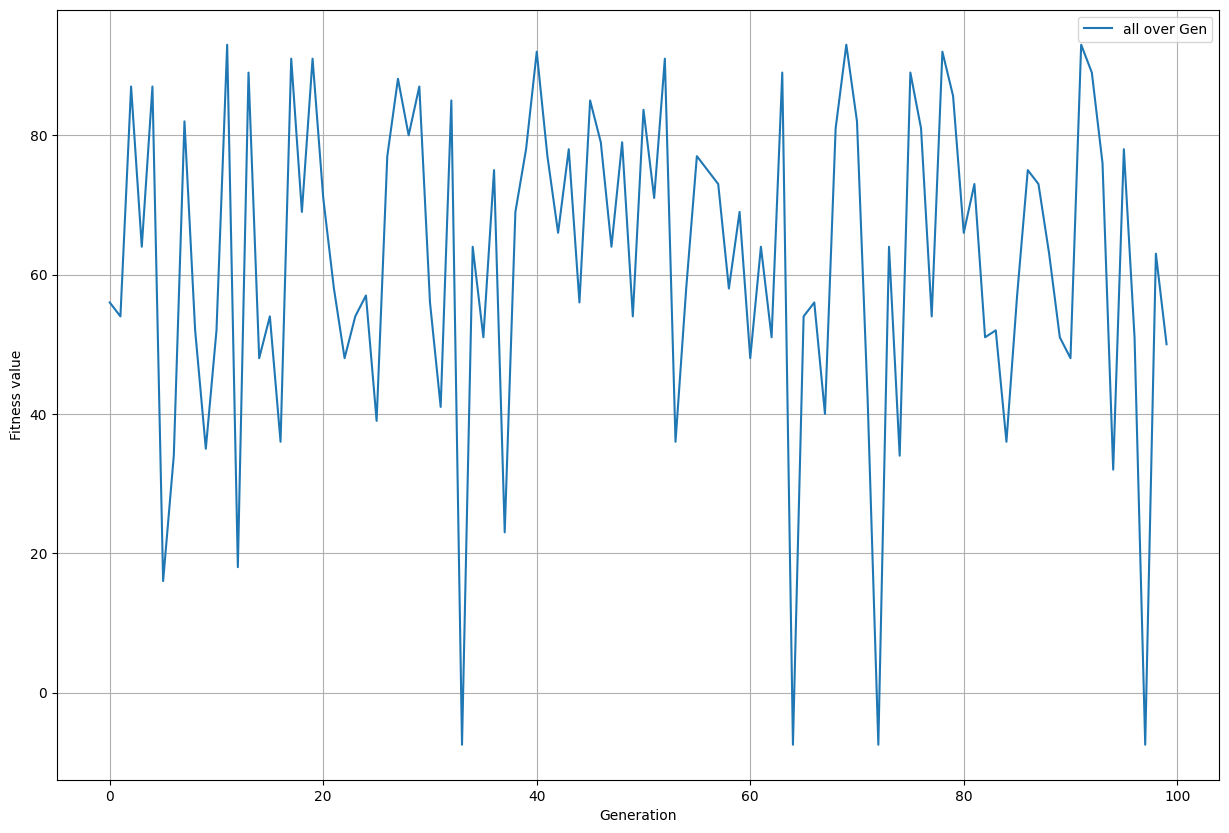

In [126]:
best_child, all_fitness = genetic_algorithm(init_population_size = firs_population_size,
                                             values= values,
                                             weights= weights,
                                             generation_size = Generation_size,
                                             KN_capacity= knapsack_capacity,
                                             elitism_rate= Elitism_rate,
                                             crossover_rate= Crossover_rate,
                                             mutation_rate= Mutation_rate, 
                                            penalty_coef = alpha,
                                            show_fitness_graph = True)



# print(all_fitness)

In [127]:
total_fitness = []
for iter in range(100):
    best_child, all_fitness = genetic_algorithm(init_population_size = firs_population_size,
                                             values= values,
                                             weights= weights,
                                             generation_size = Generation_size,
                                             KN_capacity= knapsack_capacity,
                                             elitism_rate= Elitism_rate,
                                             crossover_rate= Crossover_rate,
                                             mutation_rate= Mutation_rate, 
                                            penalty_coef = alpha,
                                            print_data = False,
                                            show_fitness_graph= False)
    

    total_fitness.append(np.mean(all_fitness))

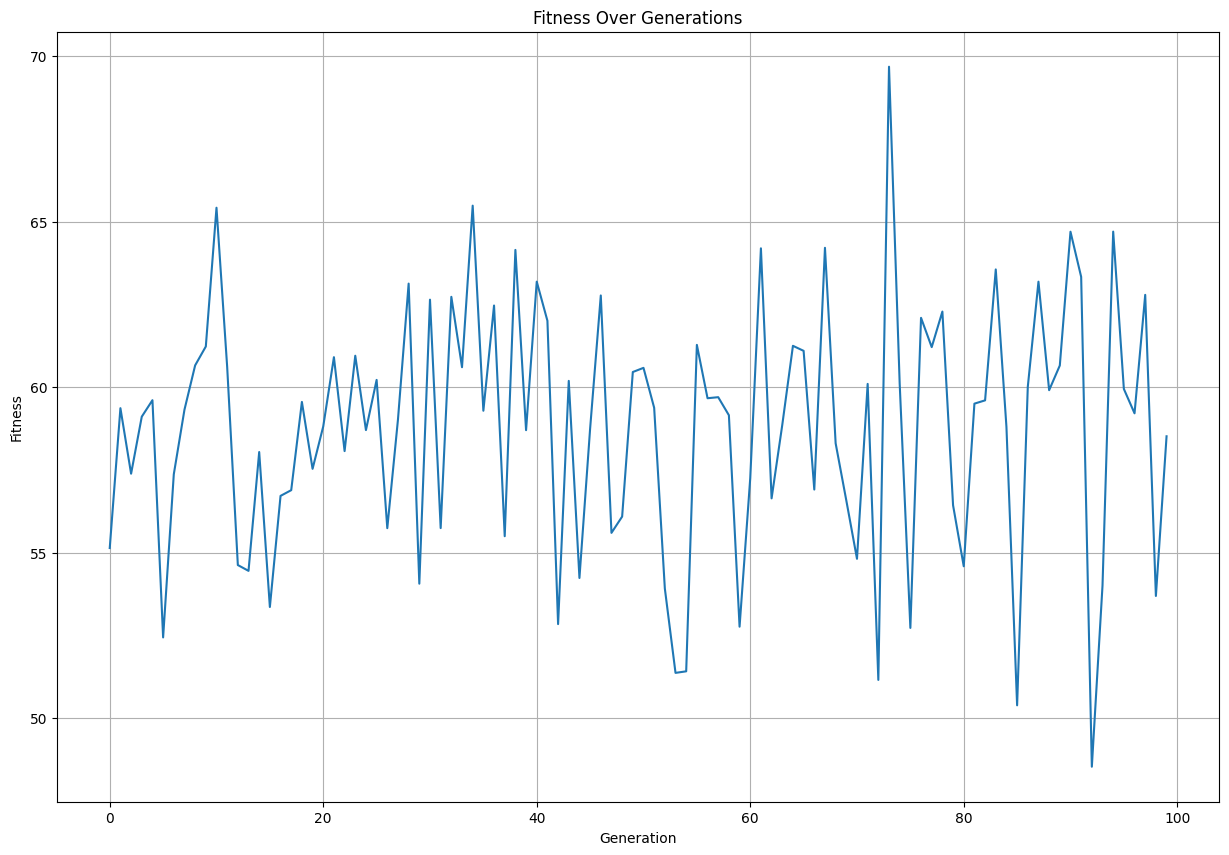

In [128]:
# Plot mean fitness values
plt.figure(figsize=(15, 10) )
sns.lineplot(total_fitness, legend= False)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations')
plt.grid()
plt.show()